<a href="https://colab.research.google.com/github/HernandoMV/filled-in-line-plot/blob/main/filled-in-line-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# import packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# set a sns palette
color_palette = [
    (0.24715576, 0.49918708, 0.57655991),
    (0.72162039, 0.3669119 , 0.22526315),
    (0.        , 0.        , 0.        ),
    ]

sns.set_palette(color_palette)

In [69]:
# read the file
file_path = "HeLa AAV8.csv"
data = pd.read_csv(file_path, header=None, index_col=None).T

In [70]:
# add columns
column_names = data.iloc[0][:].values.tolist()
column_names[0] = 'MOI'
data.columns = column_names
# remove first row
data = data.iloc[1:,:]

In [87]:
# restructure the dataframe to have a single value per line
data.dropna(inplace=True)
df = data.melt(id_vars=['MOI'], value_vars=[data.columns[1], data.columns[2], data.columns[3]])
# make the value column numeric
df['value'] = pd.to_numeric(df['value'])
# set the MOI as string
df['MOI'] = df['MOI'].astype(str)

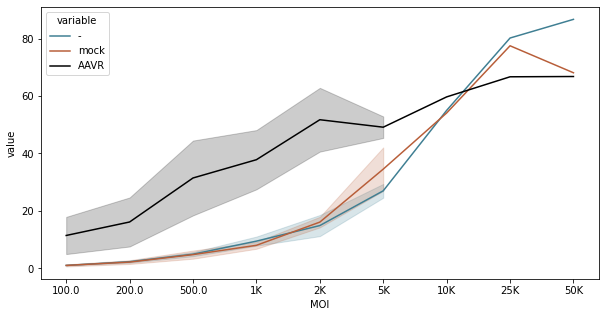

In [104]:
# make the line plot with mean and filled area between the standard deviation
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.lineplot(x="MOI", y="value", hue="variable", data=df, ci="sd", ax=ax, legend=True)
plt.show()

In [105]:
# save the figure as pdf
plt.savefig('filled-in-line-plot.pdf')

<Figure size 432x288 with 0 Axes>